Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**THE GOAL OF THIS PROJECT IS TO FIND THE QUALITY OF WATER USING VARIOUS MACHINE LEARNING ALGORITHMS AND TO FIND OUT WHICH ONE IS THE BEST MODEL AMONG ALL OF THEM.**

**About the dataset**

The dataset can be downloaded from the following link:
https://www.kaggle.com/datasets/adityakadiwal/water-potability

**Content**

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**Attributes in the dataset**

**pH value**: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**Hardness**: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total dissolved solids - TDS)**: Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**Chloramines**: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**Sulfate**: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**Conductivity**: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**Organic_carbon**: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

**IMPORTING LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Mount file into google colab

In [6]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the Data

In [7]:
df=pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

**Understanding the Data**

In [8]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [9]:
df.shape

(3276, 10)

In [10]:
df.size

32760

In [11]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
df.max()

ph                    14.000000
Hardness             323.124000
Solids             61227.196008
Chloramines           13.127000
Sulfate              481.030642
Conductivity         753.342620
Organic_carbon        28.300000
Trihalomethanes      124.000000
Turbidity              6.739000
Potability             1.000000
dtype: float64

In [13]:
df.min()

ph                   0.000000
Hardness            47.432000
Solids             320.942611
Chloramines          0.352000
Sulfate            129.000000
Conductivity       181.483754
Organic_carbon       2.200000
Trihalomethanes      0.738000
Turbidity            1.450000
Potability           0.000000
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [16]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

In [17]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [18]:
df.isnull().values.any()

True

EXPLORATORY DATA ANALYSIS/ VISUALIZATION

<Axes: >

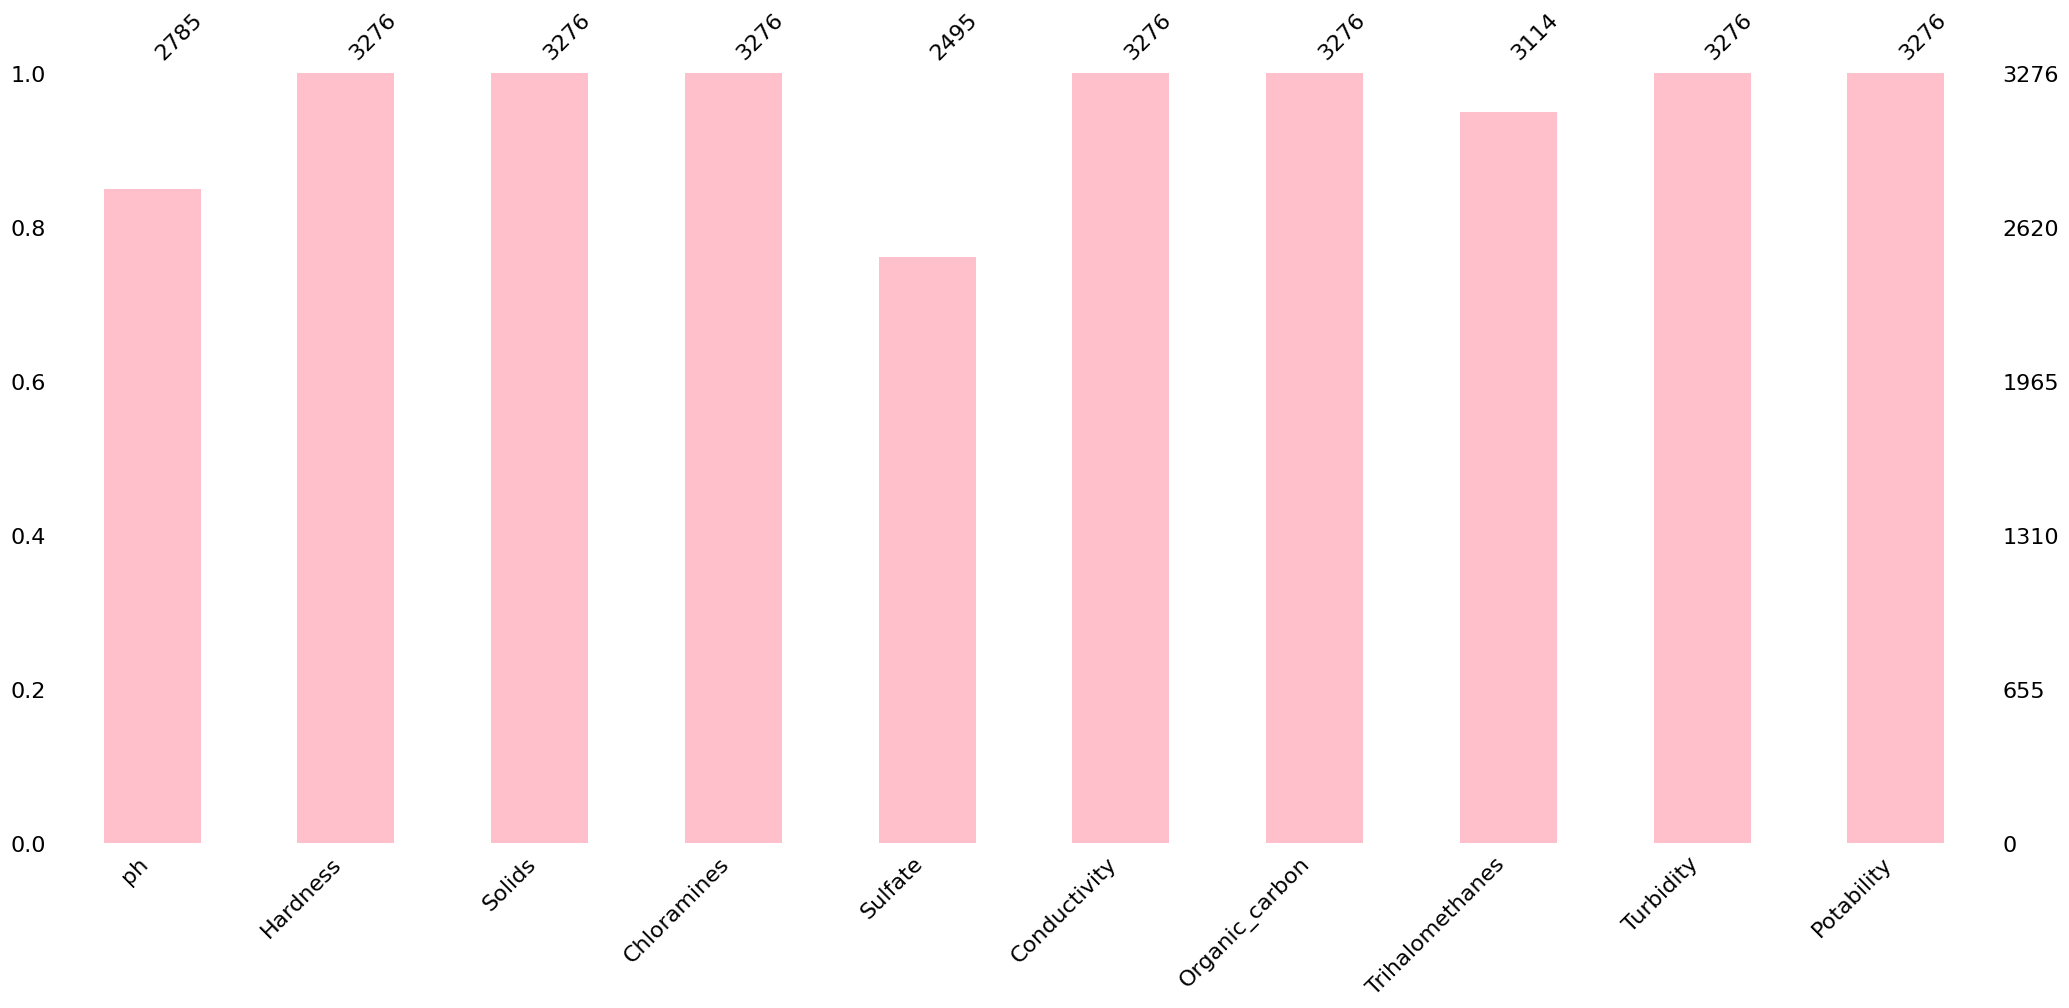

In [19]:
import missingno as no
no.bar(df, color="pink")

<Axes: >

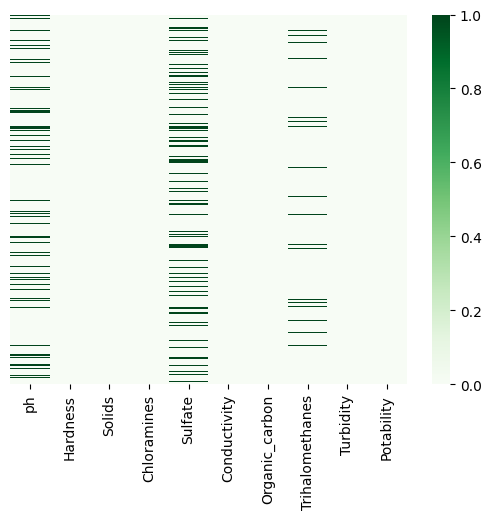

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="Greens")

In [21]:
df=df.dropna()

<Axes: ylabel='Potability'>

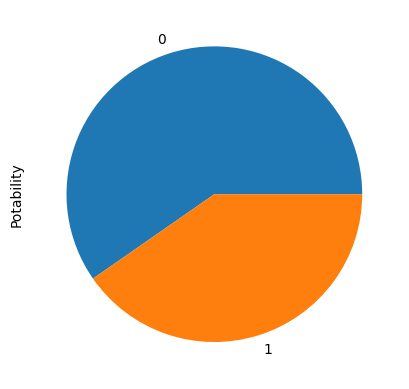

In [22]:
df.Potability.value_counts().plot(kind="pie")

<Axes: xlabel='Potability', ylabel='count'>

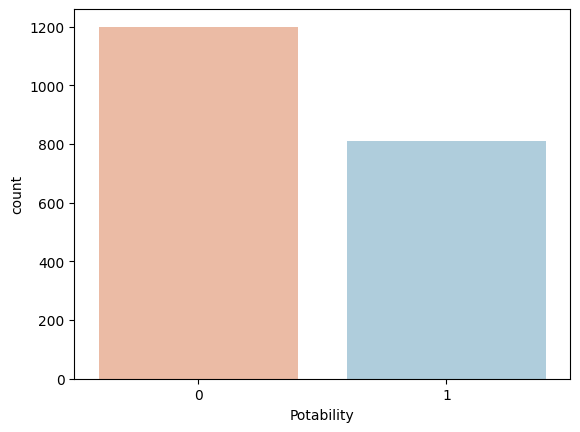

In [23]:
df.reset_index(inplace=True)
sns.countplot(data=df, x="Potability", palette="RdBu")

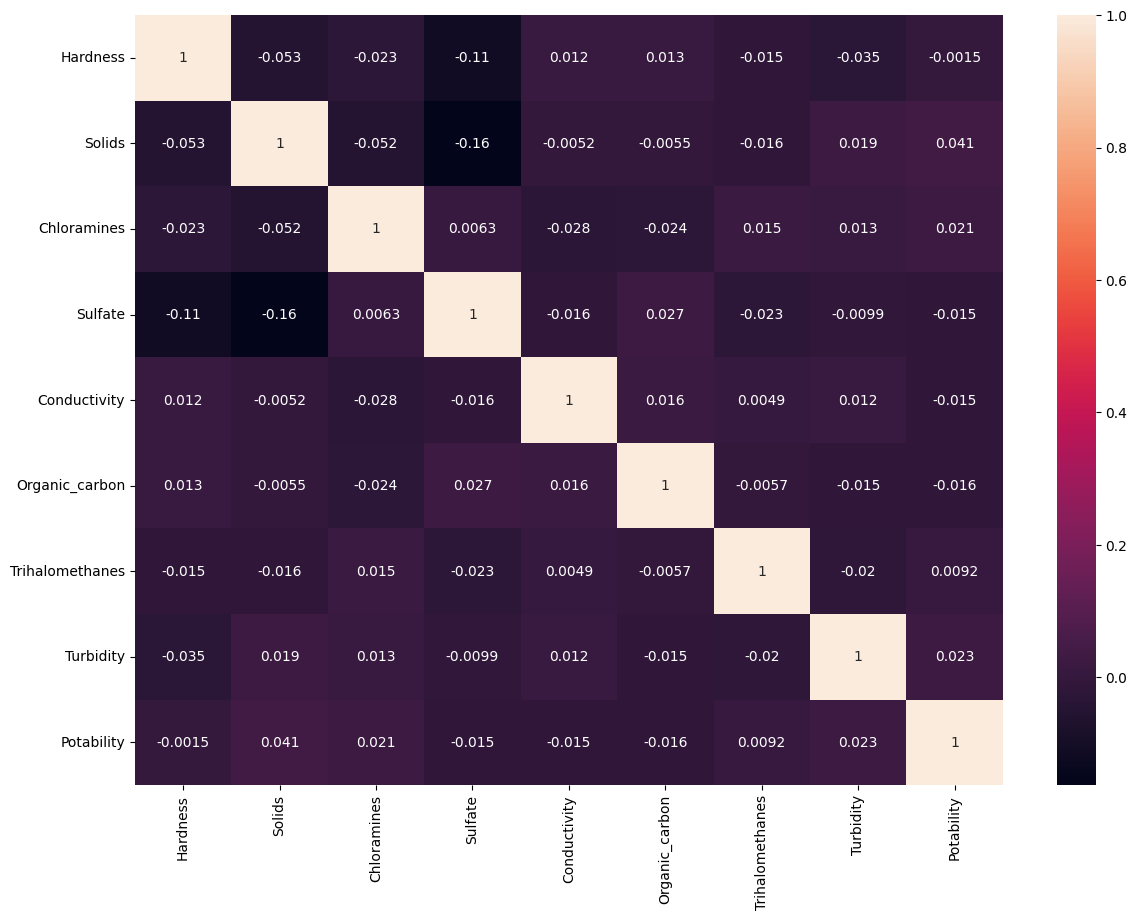

In [24]:
plt.figure(figsize=(14,10))
hm = sns.heatmap(df.iloc[:,2:].corr(), annot=True)
plt.show()

<Axes: xlabel='ph', ylabel='Hardness'>

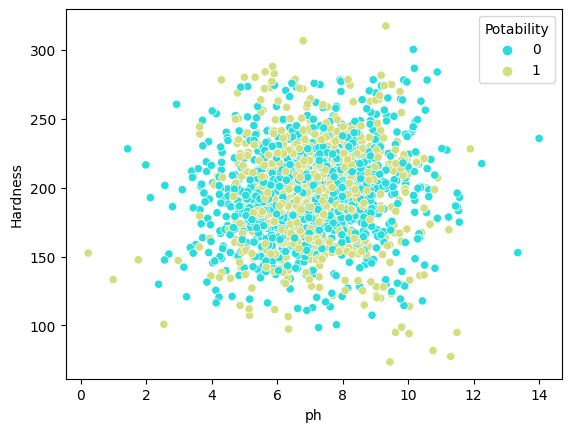

In [25]:
sns.scatterplot(x=df['ph'], y=df['Hardness'], hue=df['Potability'], palette='rainbow')

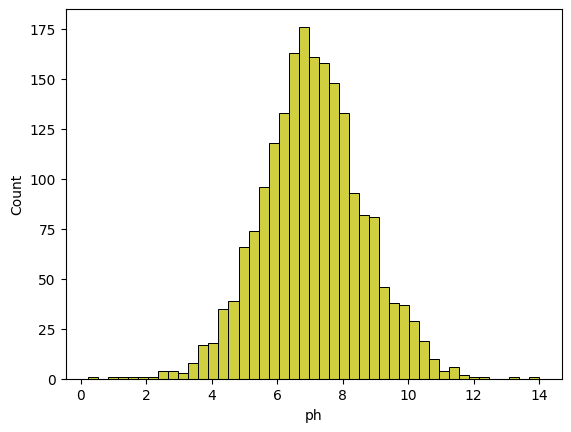

In [26]:
sns.histplot(df['ph'], color='y')
plt.show()

<Axes: xlabel='Potability', ylabel='Chloramines'>

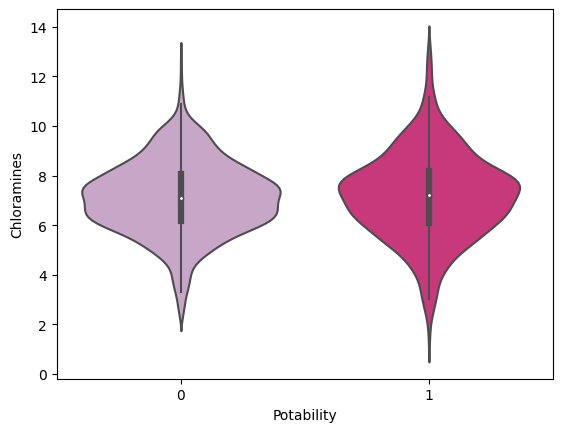

In [27]:
sns.violinplot(x=df["Potability"], y=df["Chloramines"], palette='PuRd')

<Axes: xlabel='Potability', ylabel='Turbidity'>

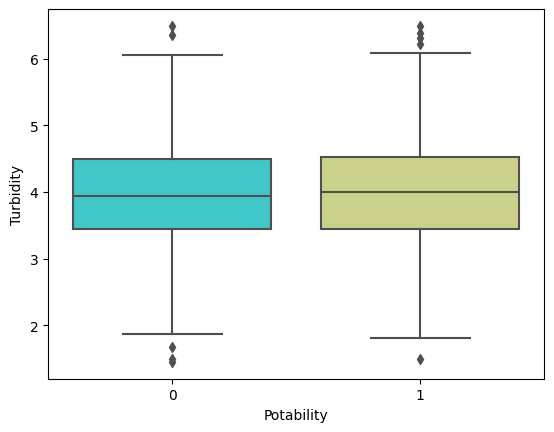

In [28]:
sns.boxplot(x=df['Potability'],y= df['Turbidity'], data=df, palette='rainbow')

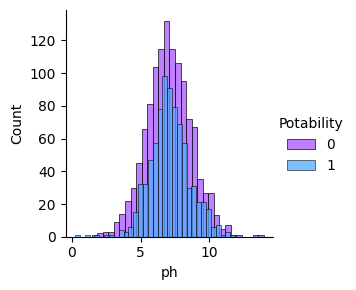

In [29]:
sns.FacetGrid(df, hue='Potability', palette='cool_r').map(sns.histplot, 'ph').add_legend()

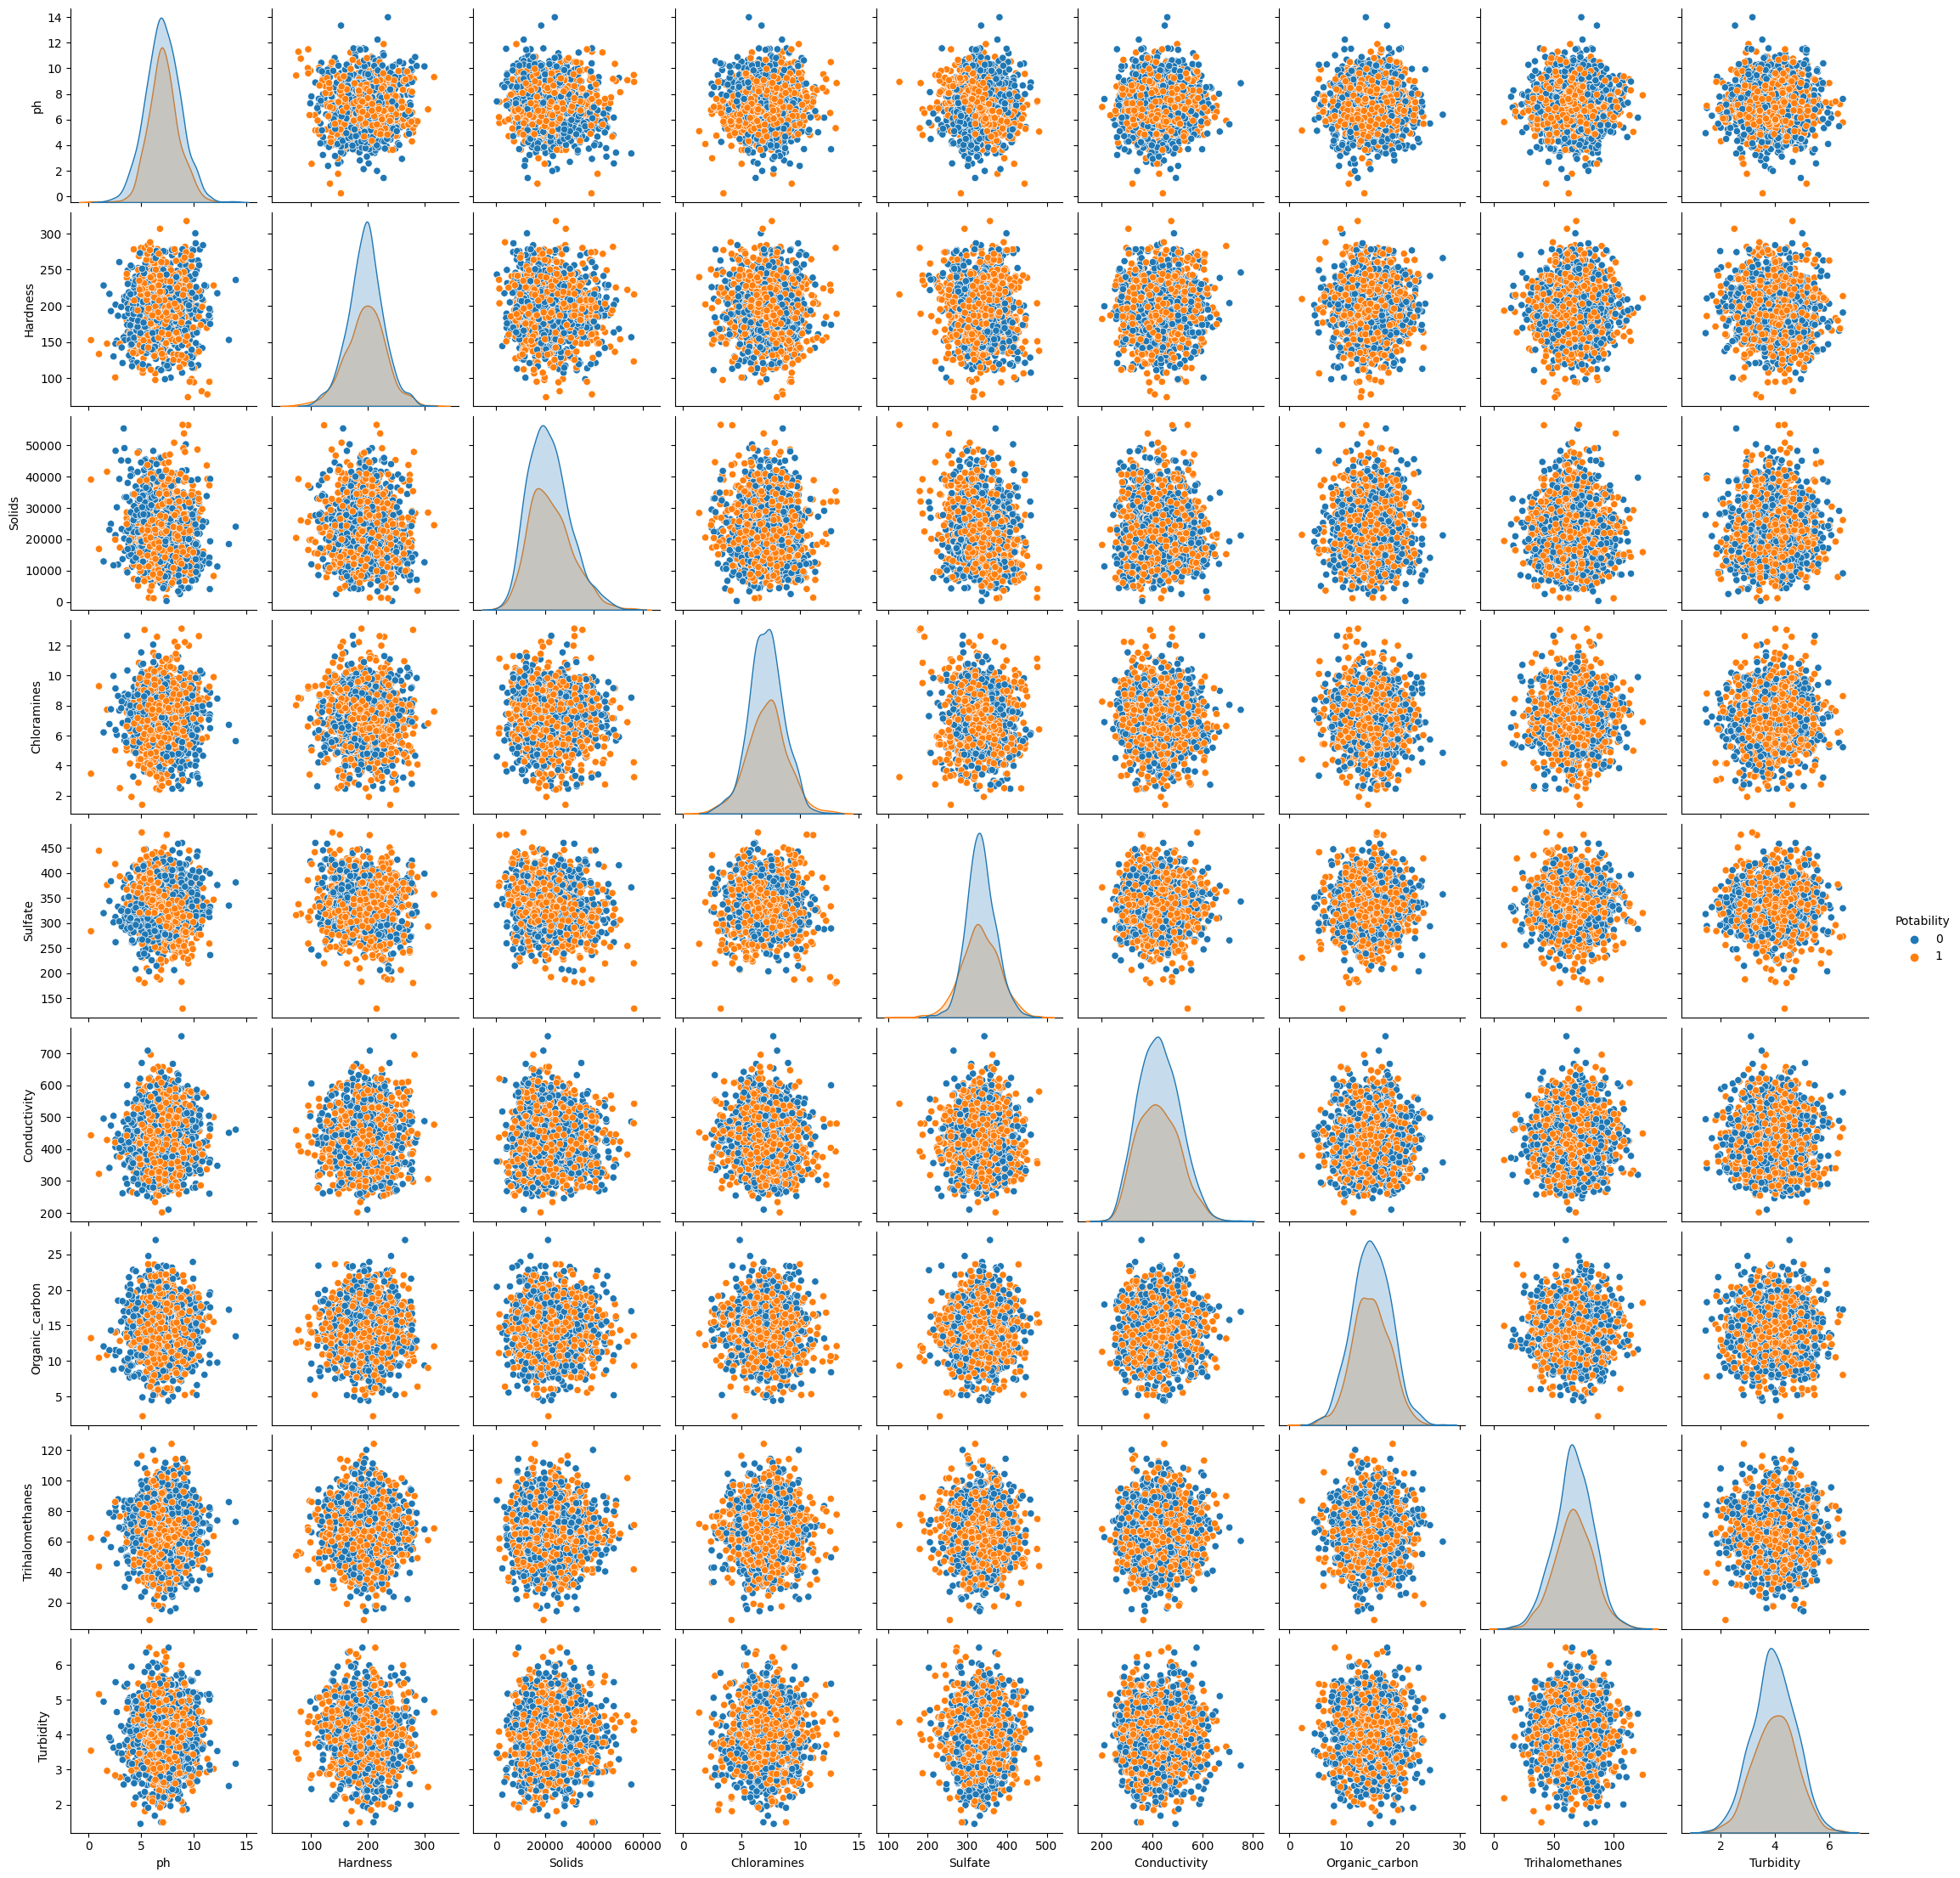

In [30]:
sns.pairplot(df, hue='Potability', vars=['ph', 'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

**SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
x.shape

(2011, 10)

In [35]:
x[:5]

index         ph    Hardness        Solids  Chloramines     Sulfate  \
0      3   8.316766  214.373394  22018.417441     8.059332  356.886136   
1      4   9.092223  181.101509  17978.986339     6.546600  310.135738   
2      5   5.584087  188.313324  28748.687739     7.544869  326.678363   
3      6  10.223862  248.071735  28749.716544     7.513408  393.663396   
4      7   8.635849  203.361523  13672.091764     4.563009  303.309771   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0    363.266516       18.436524       100.341674   4.628771  
1    398.410813       11.558279        31.997993   4.075075  
2    280.467916        8.399735        54.917862   2.559708  
3    283.651634       13.789695        84.603556   2.672989  
4    474.607645       12.363817        62.798309   4.401425

In [34]:
y[3:8]

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

**TRAINING AND TESTING DATA**

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

LOGISTIC REGRESSION

In [37]:
lm = LogisticRegression(random_state=5)
lm.fit(xtrain, ytrain)

LogisticRegression(random_state=5)

**PREDICTION**

In [38]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)
print(ypred_test)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
df=pd.DataFrame(ypred_test, ytest)
df.head()

0
Potability   
0           0
0           0
0           0
0           1
1           0

**CONFUSION MATRIX**

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score


cm = confusion_matrix(ytest, ypred_test)
cm

array([[364,  35],
       [231,  34]])

<Axes: >

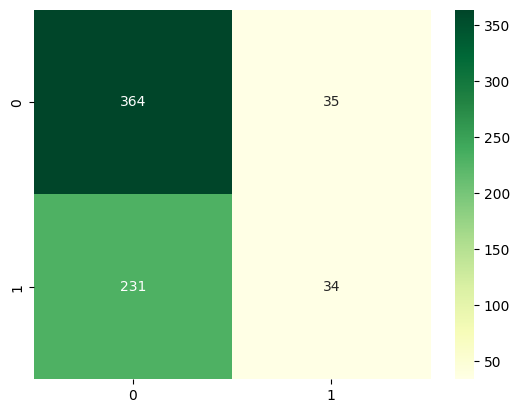

In [41]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

**ACCURACY SCORE**

In [43]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 59.68819599109132
Accuracy of testing data: 59.93975903614458


SUPPORT VECTOR MACHINE

In [44]:
svc = SVC(C=10)
svc.fit(xtrain, ytrain)

SVC(C=10)

**PREDICTION**

In [45]:
ypred_train = svc.predict(xtrain)
ypred_test = svc.predict(xtest)
# print(ypred_test)

**CONFUSION MATRIX**

In [46]:
cmt = np.array(confusion_matrix(ypred_test, ytest))
cmt

array([[398, 264],
       [  1,   1]])

<Axes: >

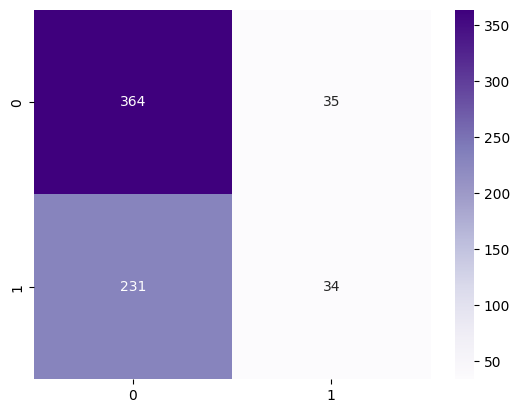

In [48]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

**ACCURACY**

In [49]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 59.68819599109132
Accuracy of testing data: 60.09036144578314


DECISION TREE

In [50]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

**PREDICTION**

In [51]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

CONFUSION MATRIX

In [52]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[396,   0],
       [  3, 265]])

<Axes: >

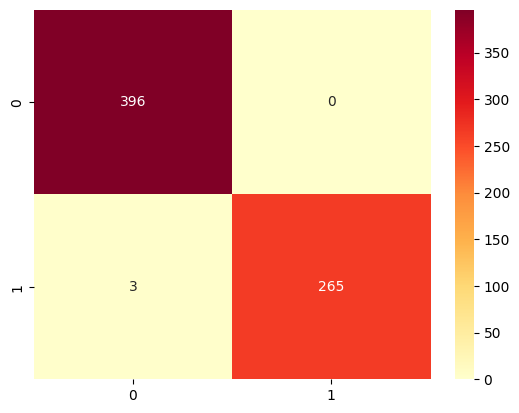

In [53]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')


**ACCURACY**

In [54]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 99.54819277108435


**K NEAREST NEIGHBOUR**

In [55]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

**PREDICTION**

In [56]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

**CONFUSION MATRIX**

In [57]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[325, 211],
       [ 74,  54]])

<Axes: >

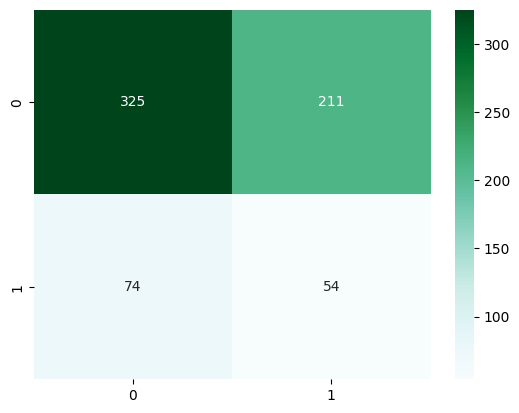

In [58]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuGn" ,fmt='g')

**ACCURACY**

In [59]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 70.97253155159613
Accuracy of testing data: 57.07831325301205


**NAIVE BAYES**

In [60]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

**PREDICTION**

In [61]:
ypred_train = gnb.predict(xtrain)
ypred_test = gnb.predict(xtest)

**CONFUSION MATRIX**

In [62]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[340, 191],
       [ 59,  74]])

<Axes: >

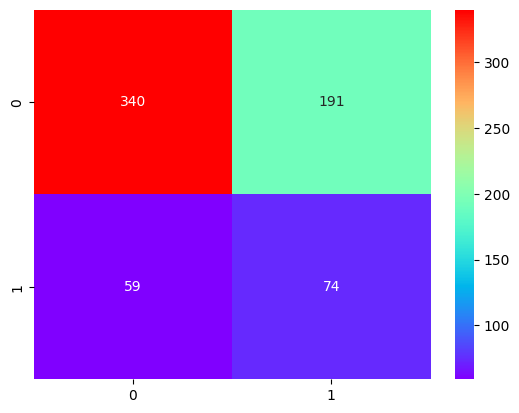

In [63]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="rainbow" ,fmt='g')

**ACCURACY**

In [64]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 62.28656273199703
Accuracy of testing data: 62.34939759036144


**RANDOM FOREST CLASSIFIER**

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

**PREDICTION**

In [66]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

**CONFUSION MATRIX**

In [67]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[373,  83],
       [ 26, 182]])

<Axes: >

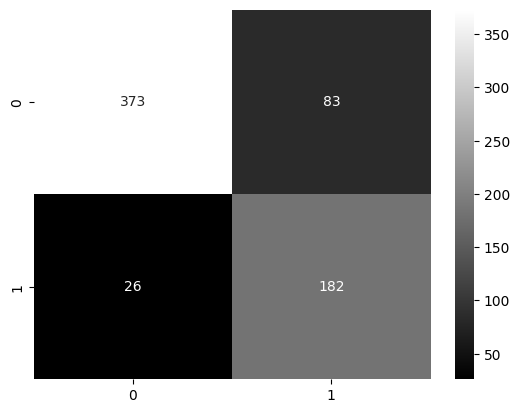

In [68]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="gray" ,fmt='g')

**ACCURACY**

In [69]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac6 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac6)

Accuracy of training data: 100.0
Accuracy of testing data: 83.58433734939759


**Comparing Accuracy of Different Models**

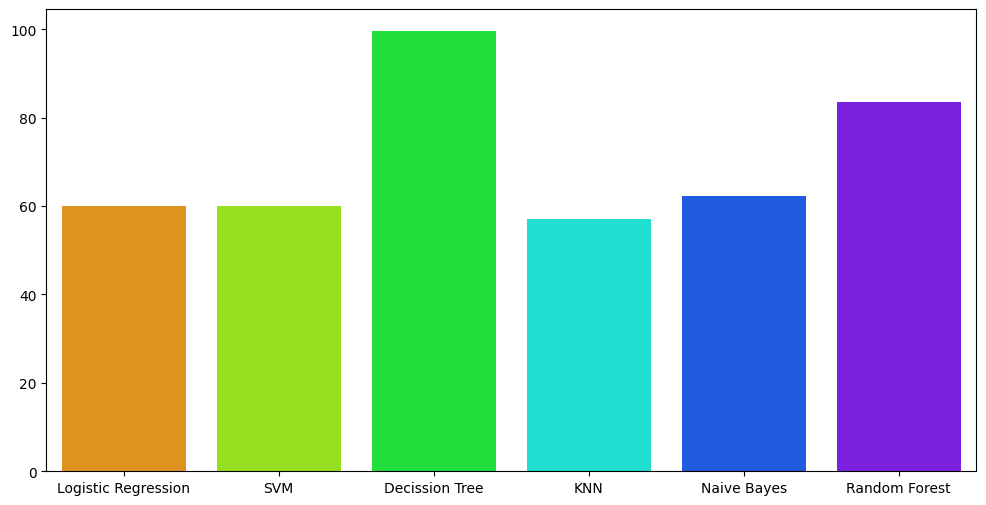

In [70]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'Decission Tree', ac4:'KNN', ac5: 'Naive Bayes', ac6: 'Random Forest'}

plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');